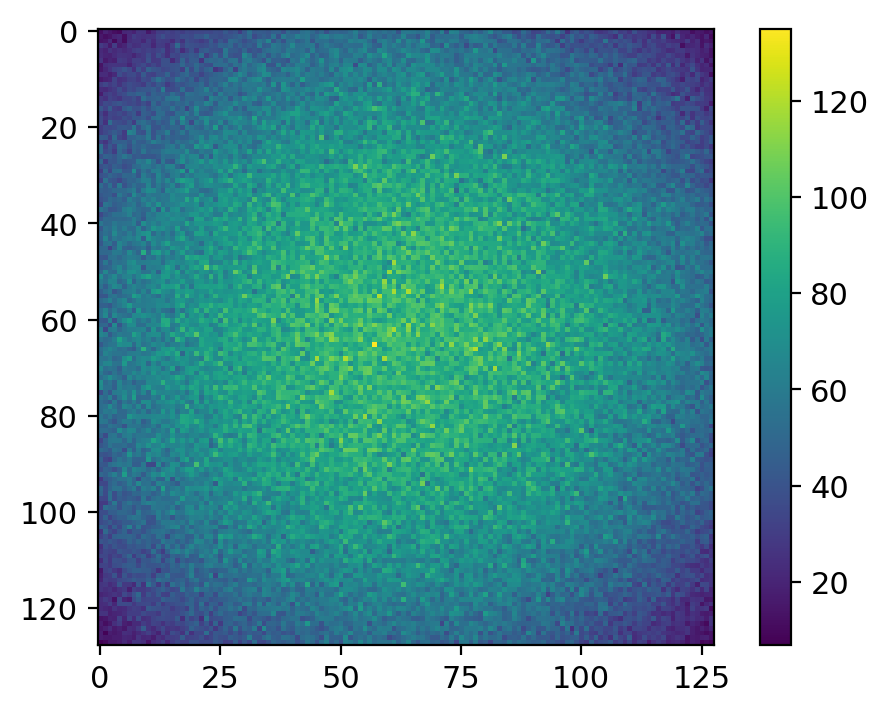

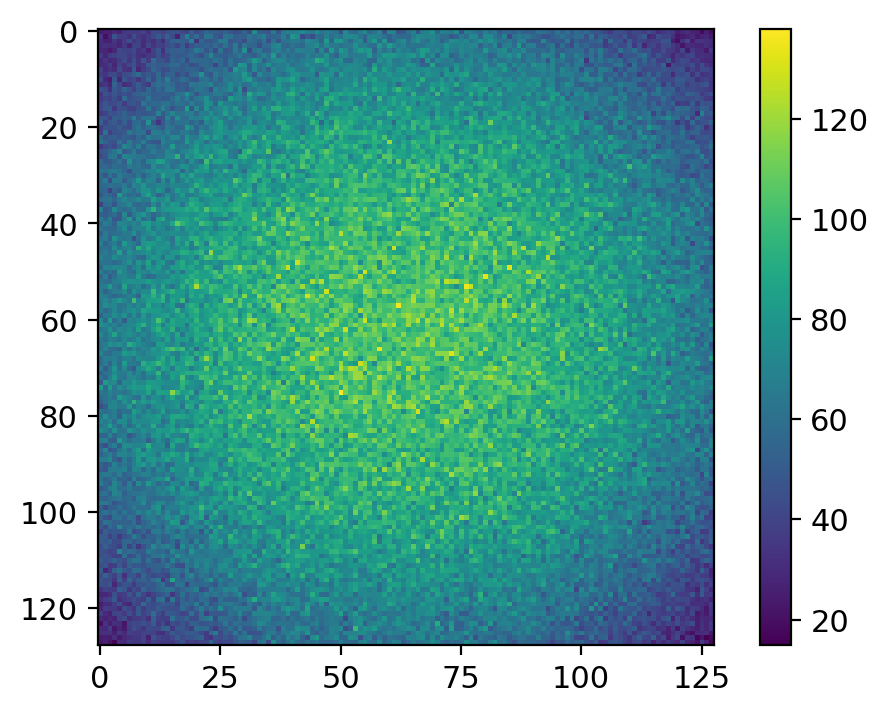

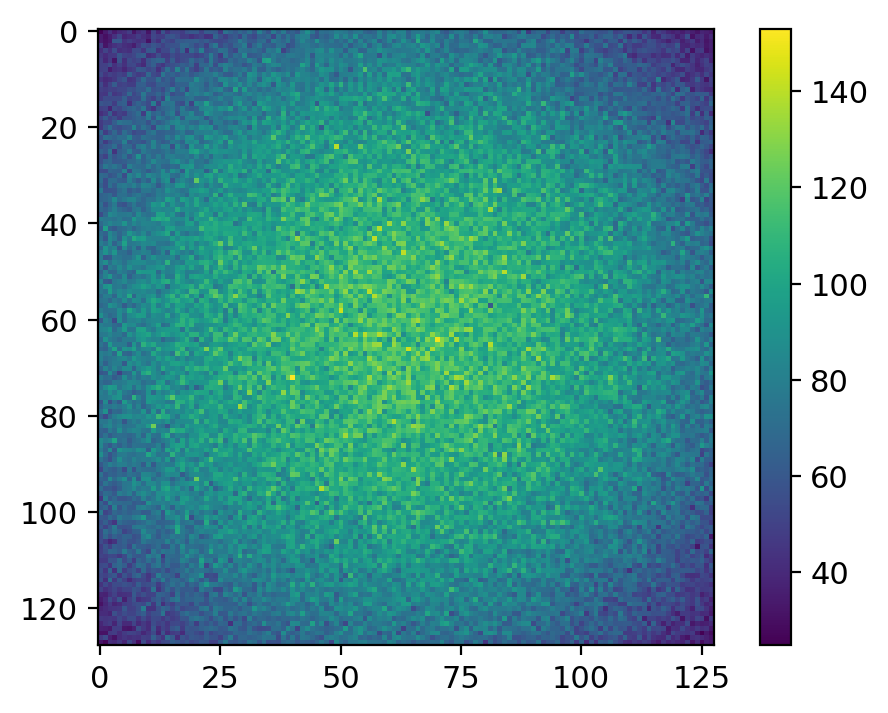

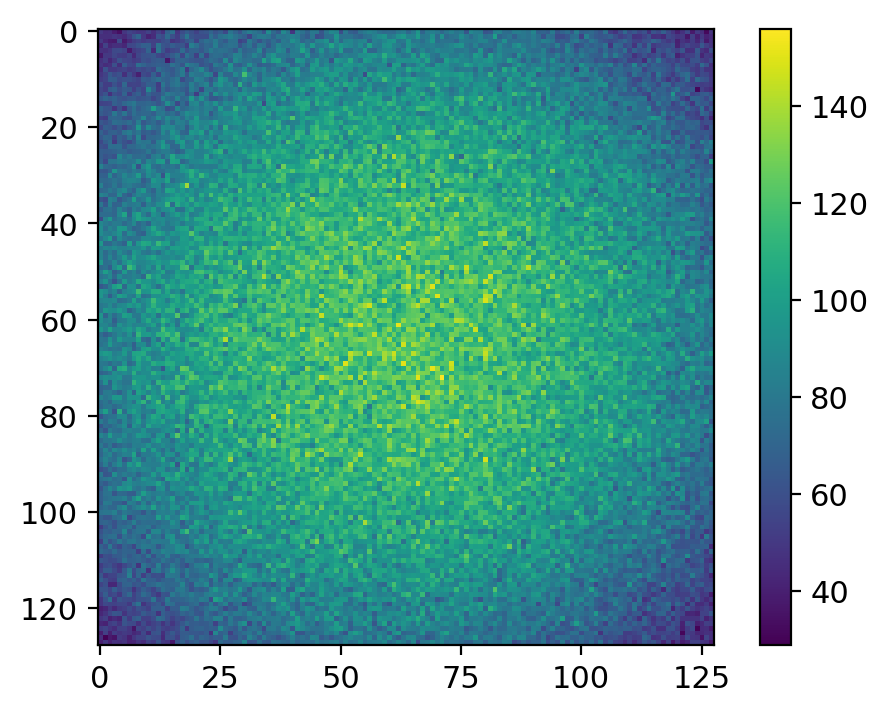

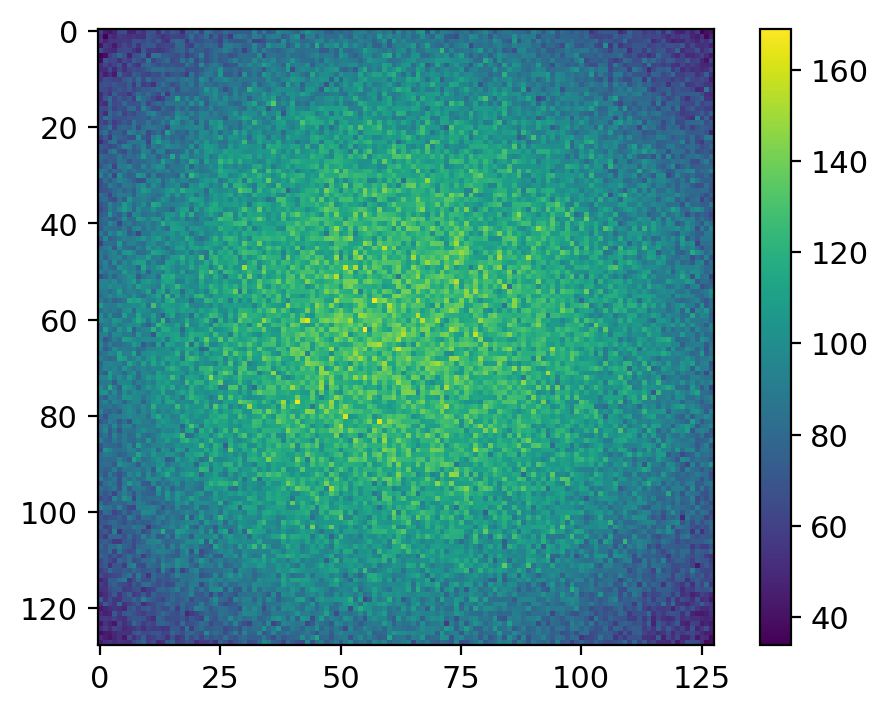

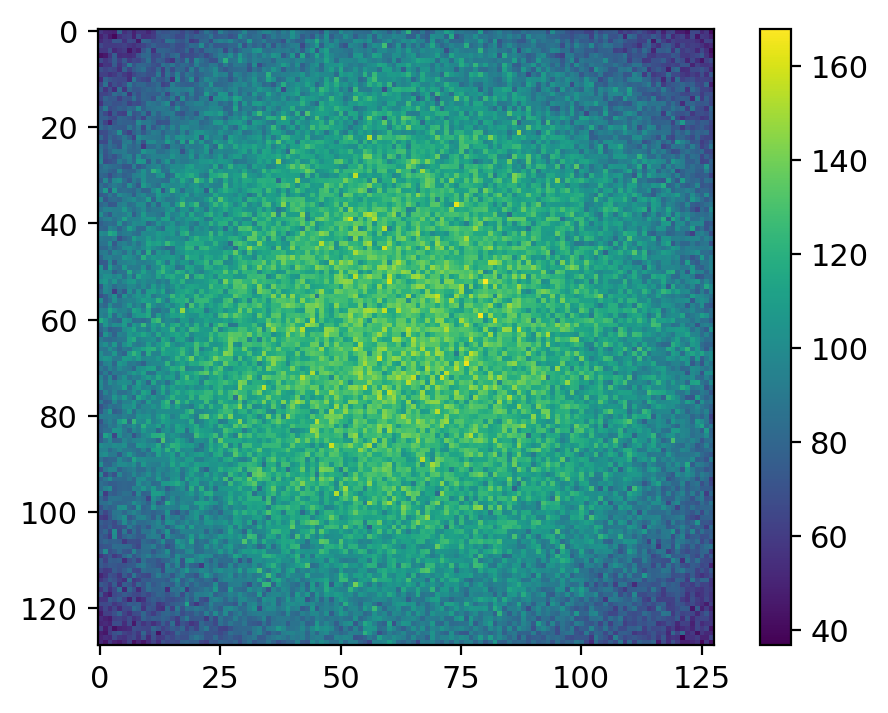

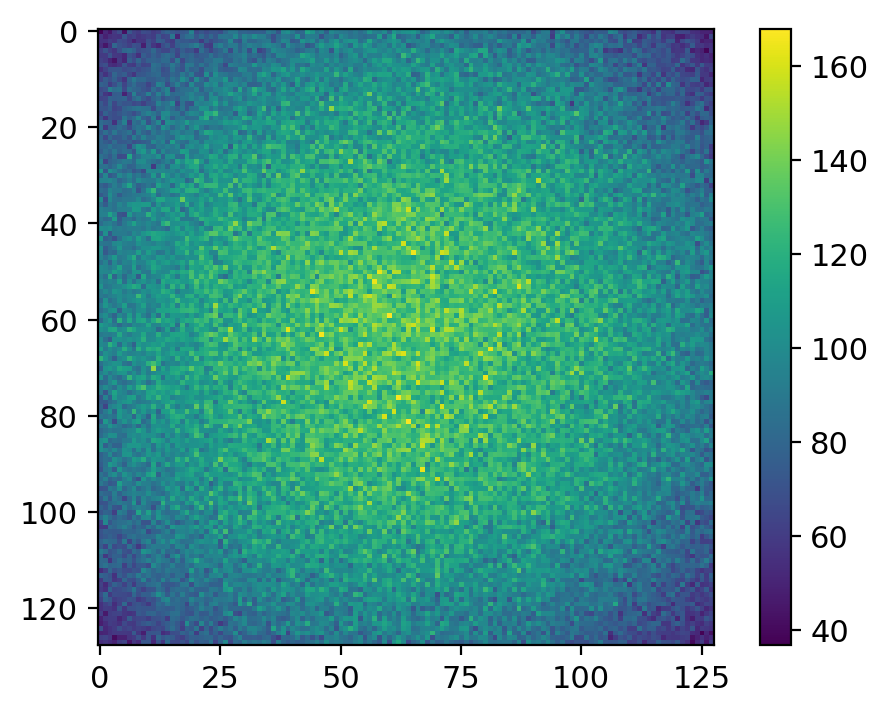

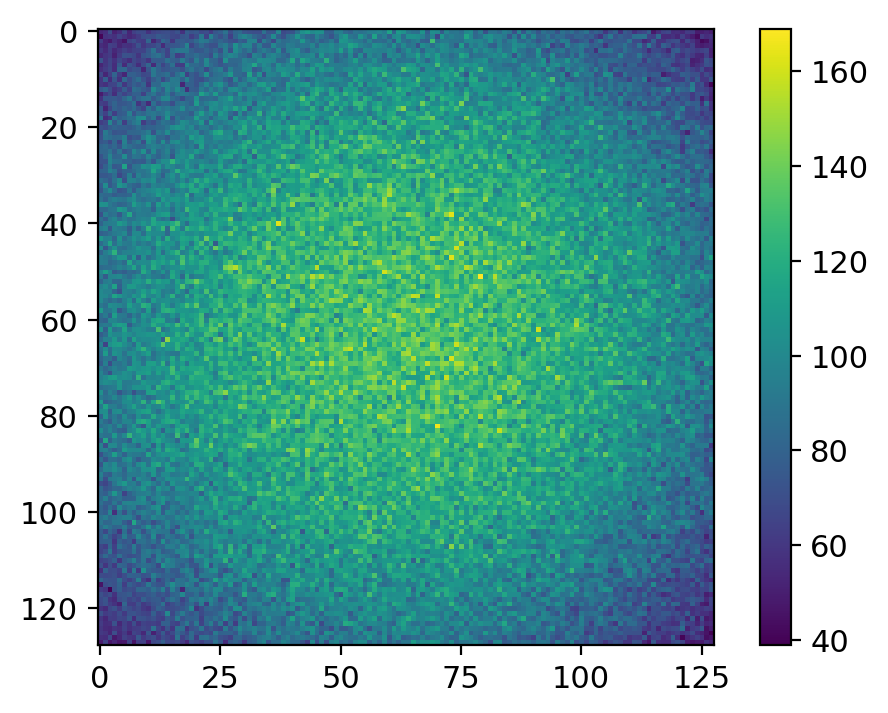

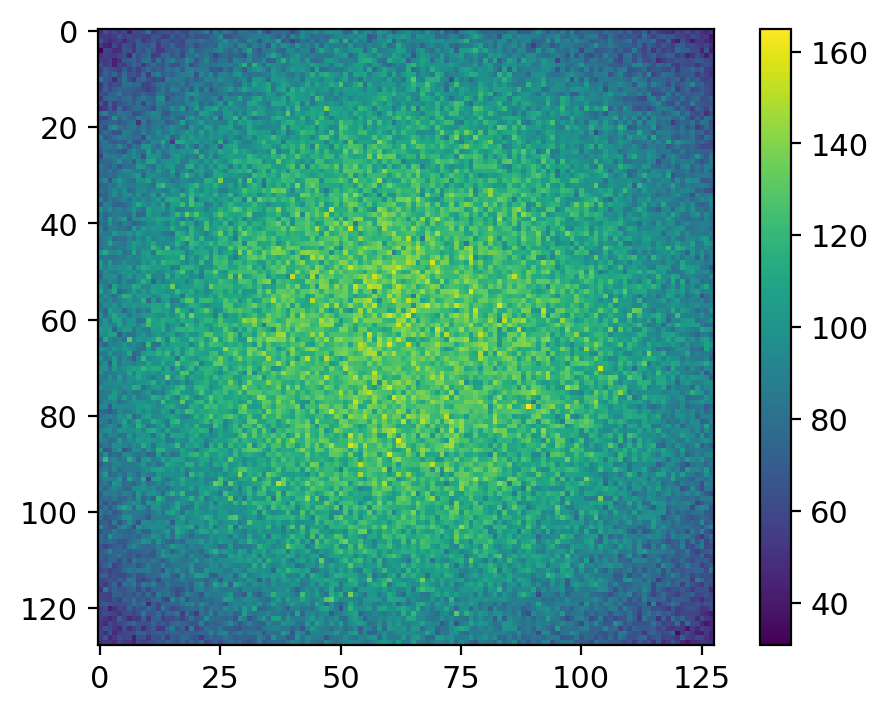

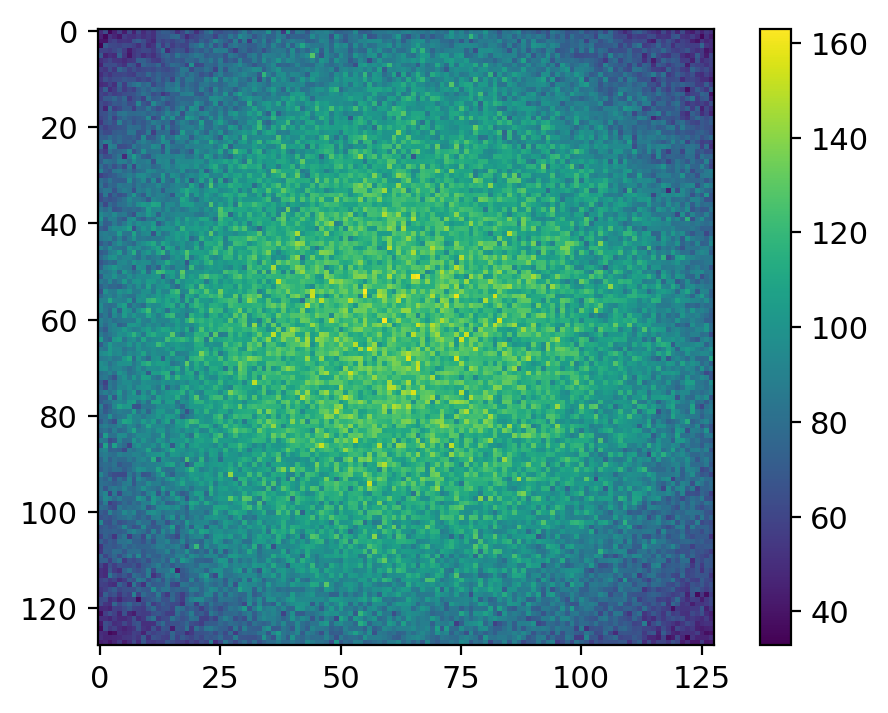

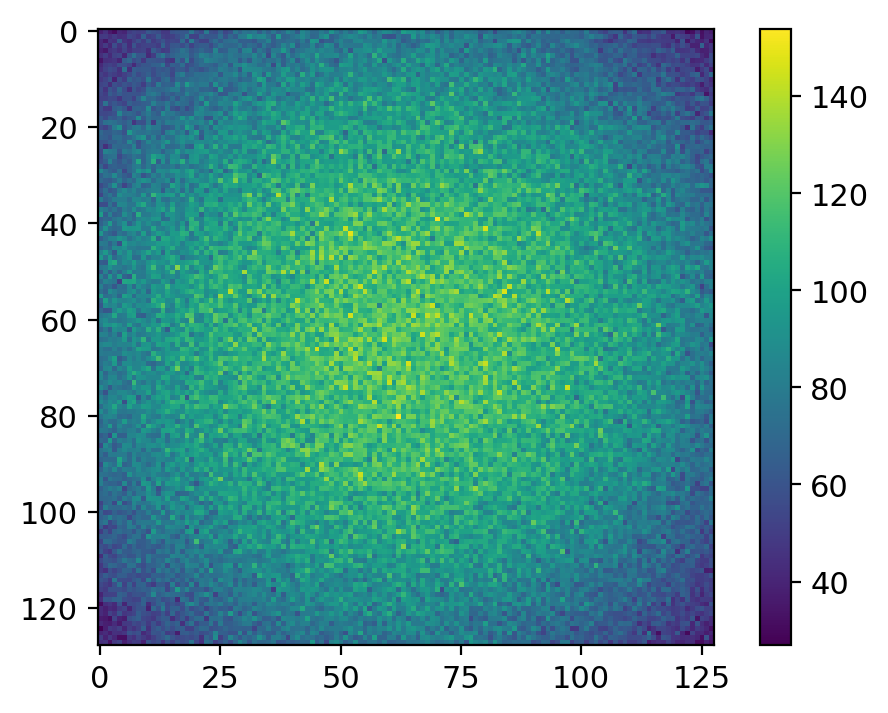

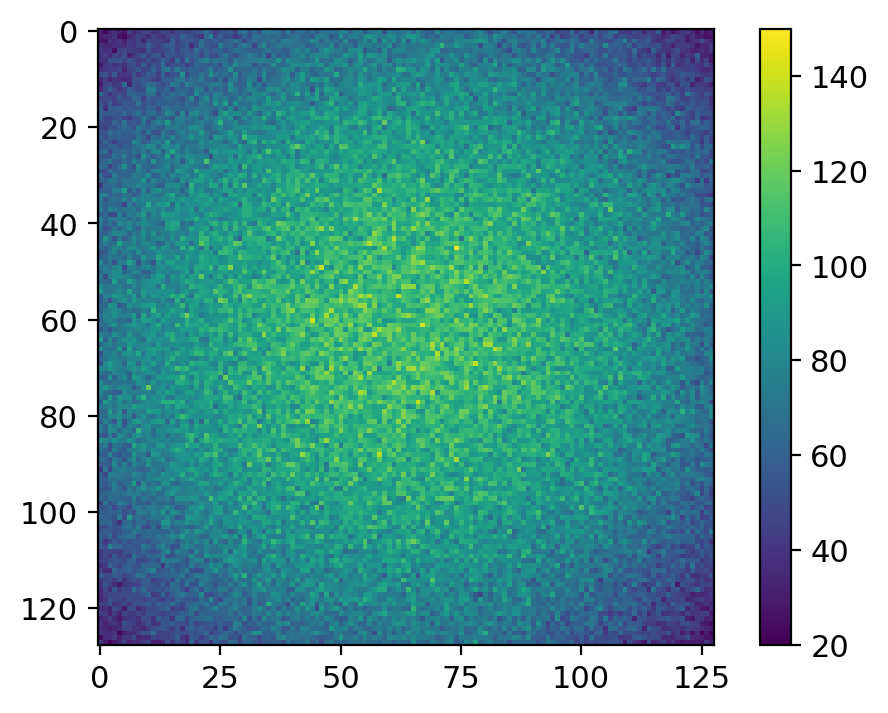

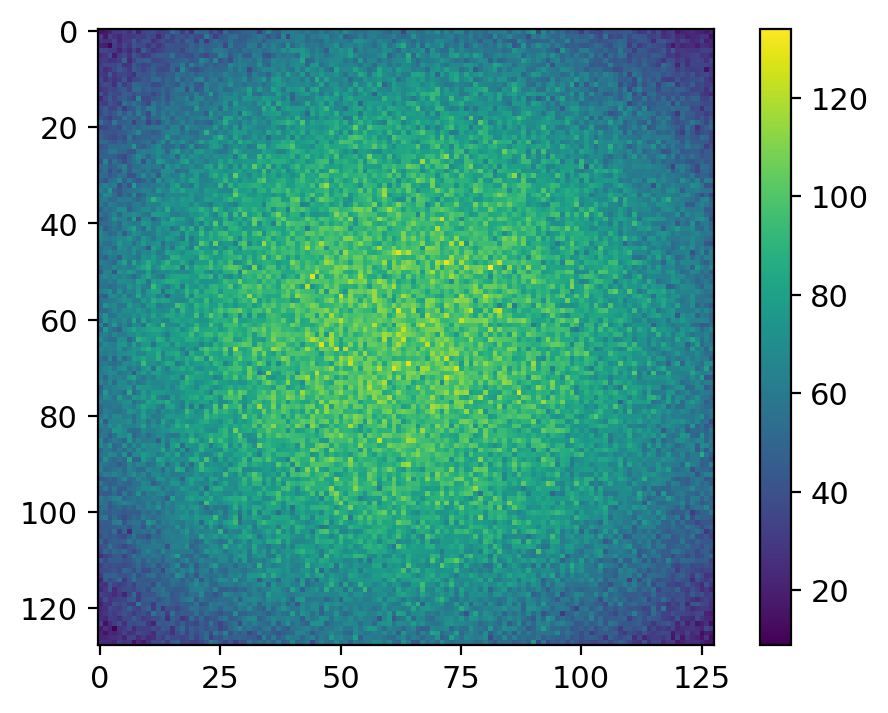

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from basicpy import BaSiC

np.random.seed(42)  # answer to the meaning of life, should work here too

n_images = 8

"""Generate a parabolic gradient to simulate uneven illumination"""
# Create a gradient
size = 128
grid = np.meshgrid(*(3 * (np.linspace(-size // 2 + 1, size // 2, size),)))

# Create the parabolic gradient (flatfield) with and offset (darkfield)
gradient = sum(d**2 for d in grid)
gradient = 0.01 * (np.max(gradient) - gradient) + 10
gradient_int = gradient.astype(np.uint8)

# Ground truth, for correctness checking
truth = gradient / gradient.mean()

# Create an image stack and add poisson noise
images = np.random.poisson(lam=gradient_int, size=(n_images, size, size, size))

for i in range(0,size,10):
    plt.imshow(images[0,:,:,i])
    plt.colorbar()
    plt.show()

In [7]:
basic = BaSiC(get_darkfield=False,lambda_flatfield_coef=10)
basic.fit(images)

INFO:basicpy.basicpy:Initializing BaSiC 5326684736 with parameters: 
get_darkfield: False
lambda_flatfield_coef: 10

INFO:basicpy.basicpy:=== BaSiC fit started ===
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 7.2035868470266e-07.
INFO:basicpy.basicpy:mean of S: 0.9999999403953552.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 8.779290965321707e-07.
INFO:basicpy.basicpy:mean of S: 1.0000001192092896.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.0023114013019949198
INFO:basicpy.basicpy:elapsed time: 32.249541741 seconds
INFO:basicpy.basicpy:Reweighting converged.
INFO:basicpy.basicpy:=== BaSiC fit finished in 32.252430970999995 seconds ===


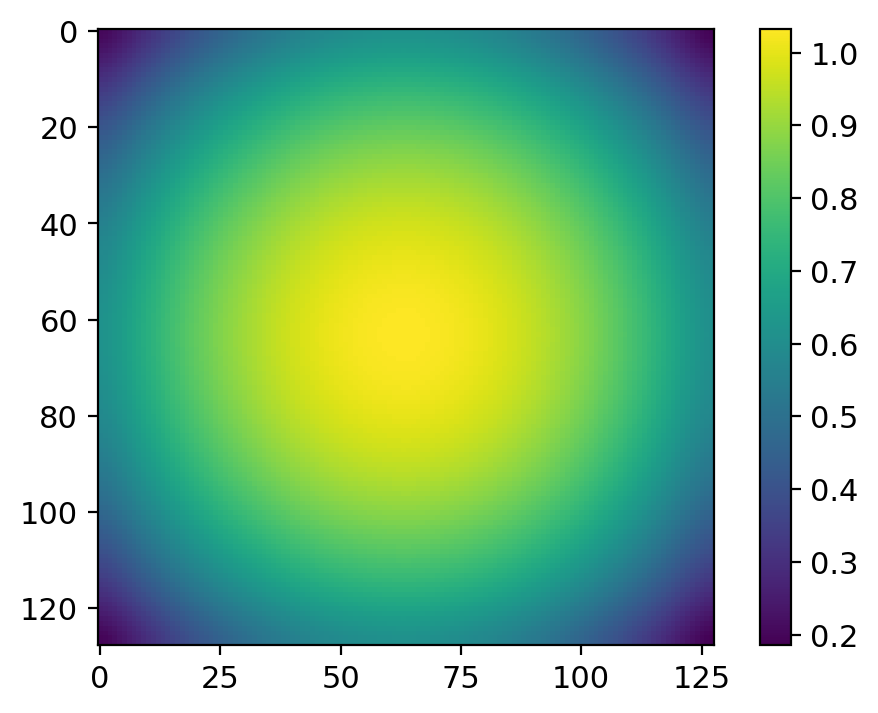

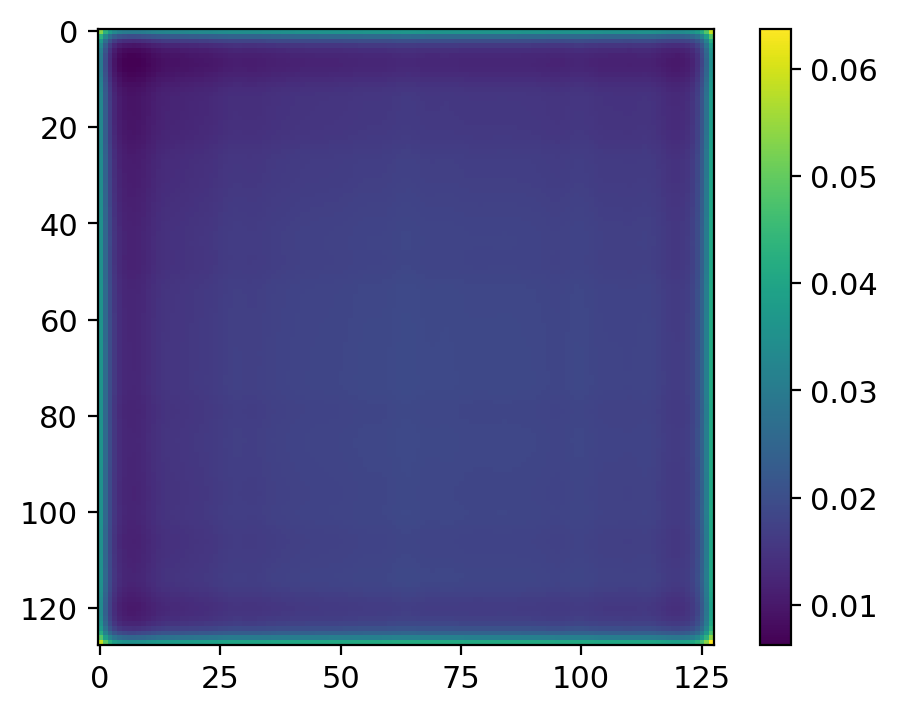

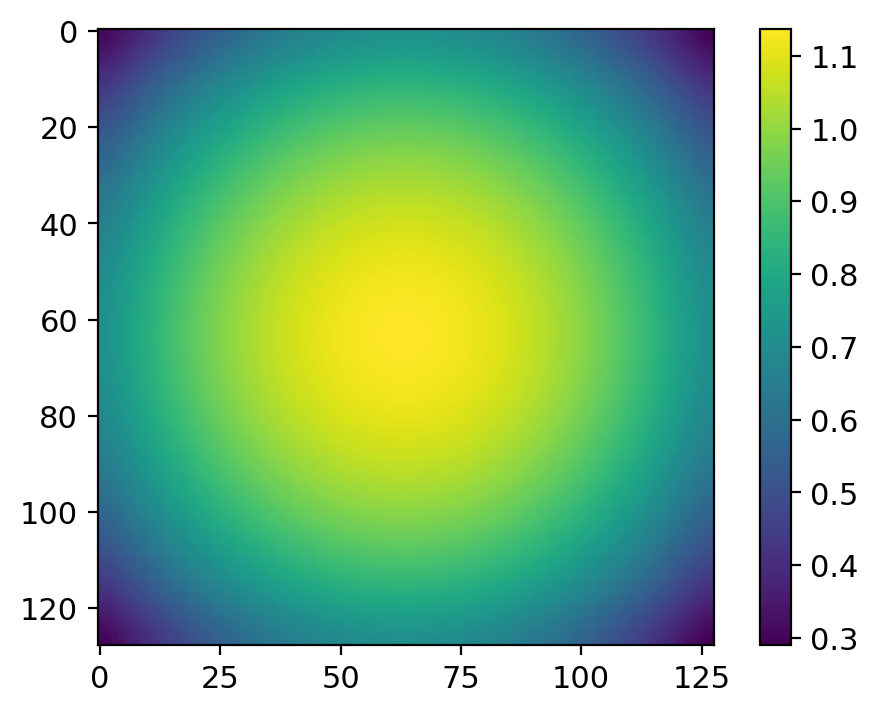

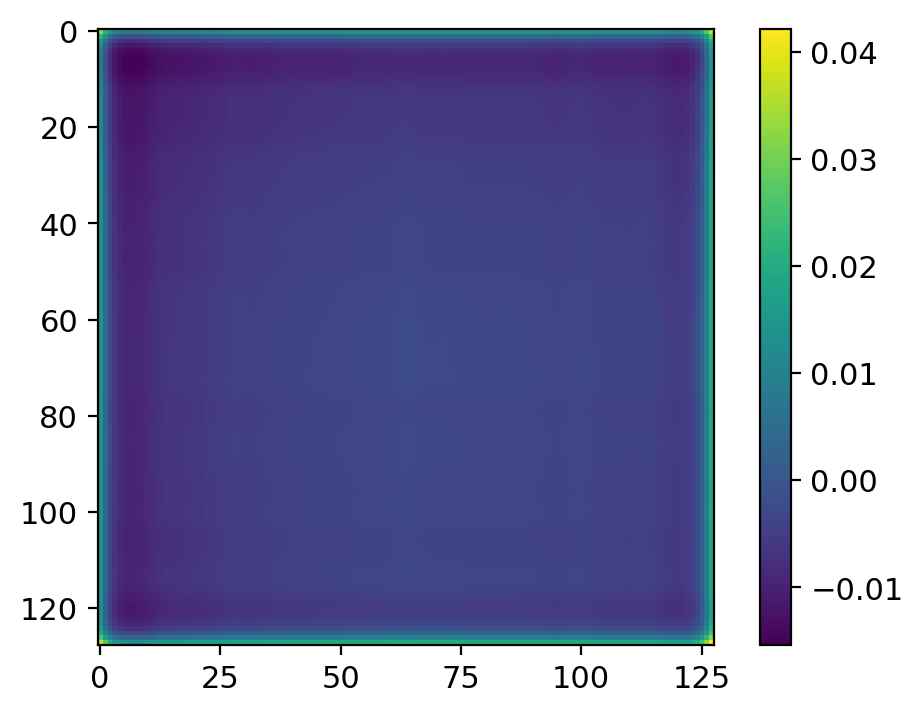

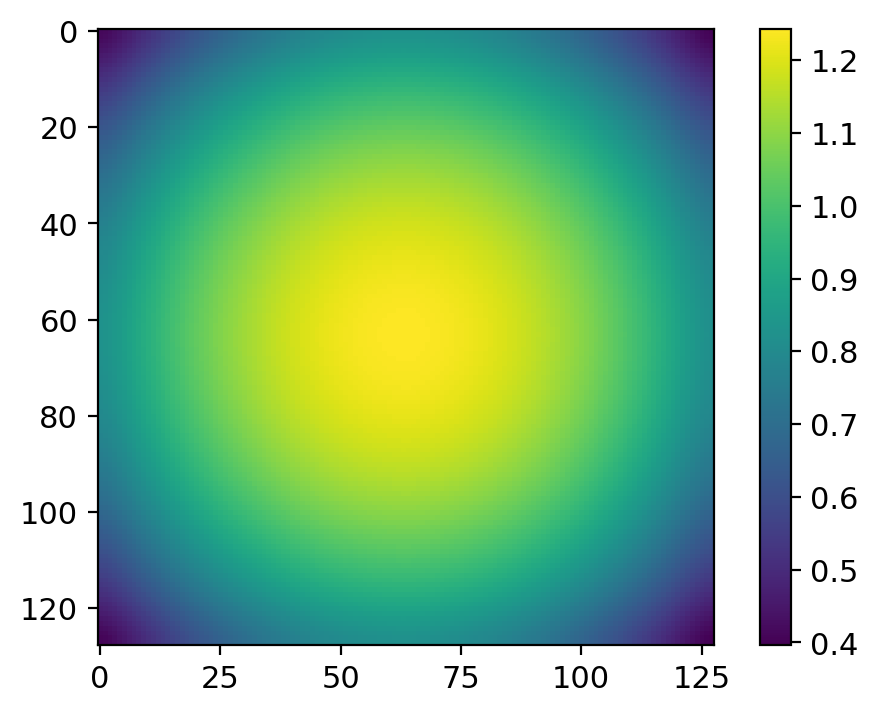

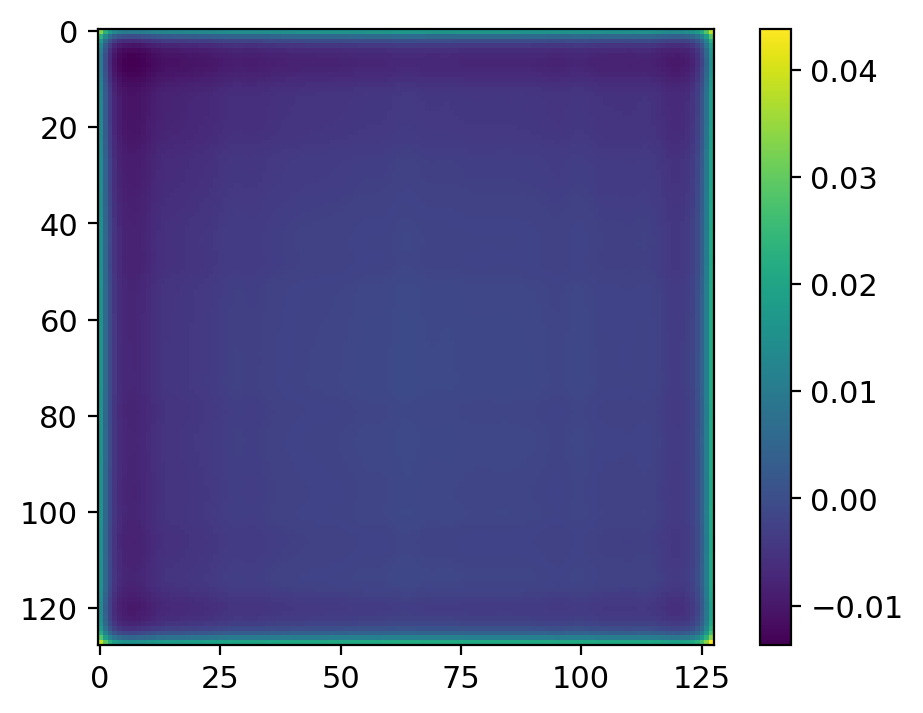

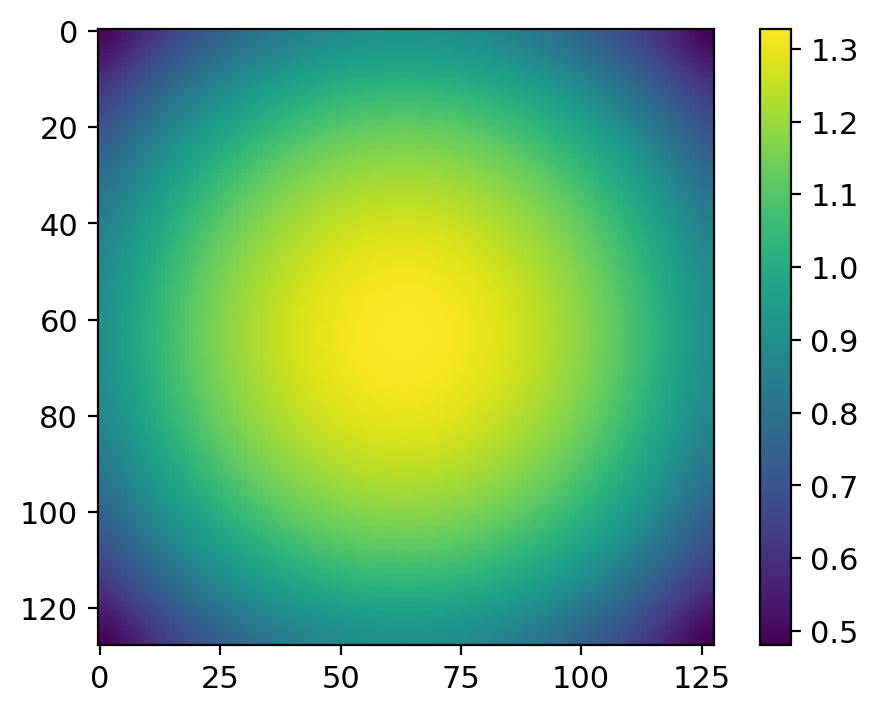

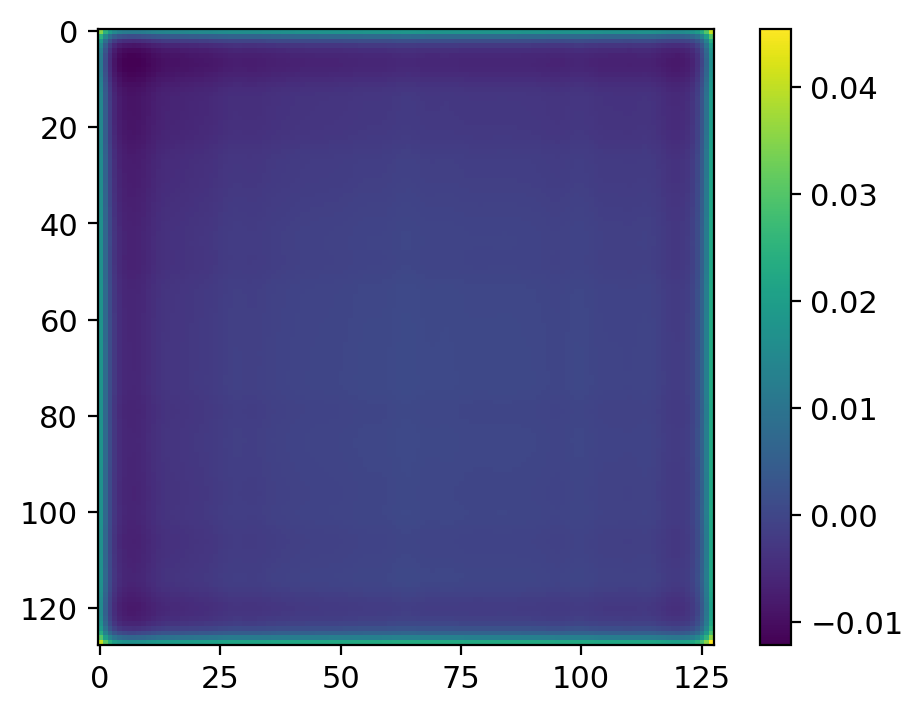

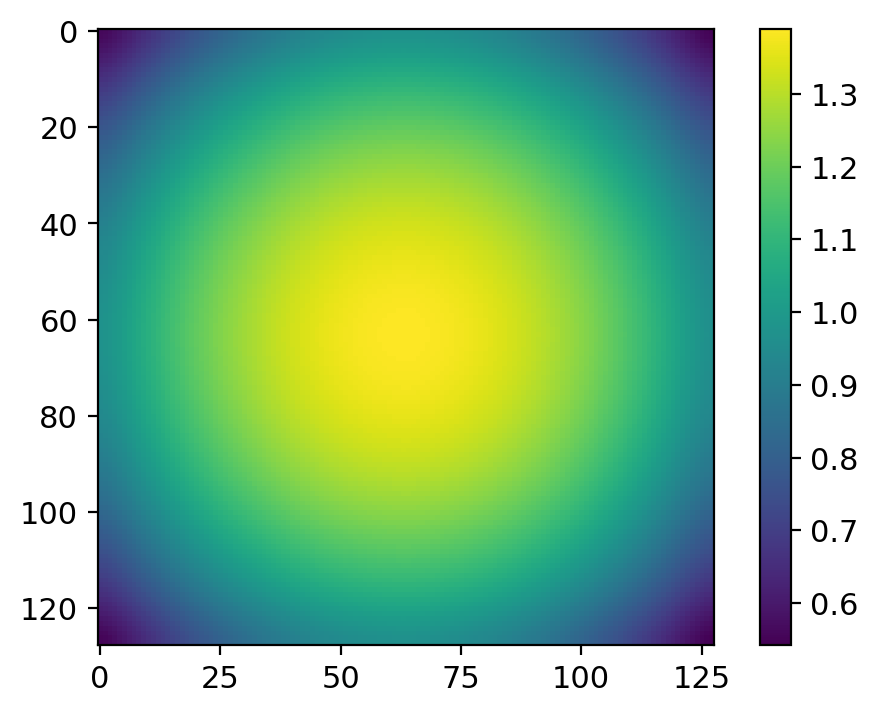

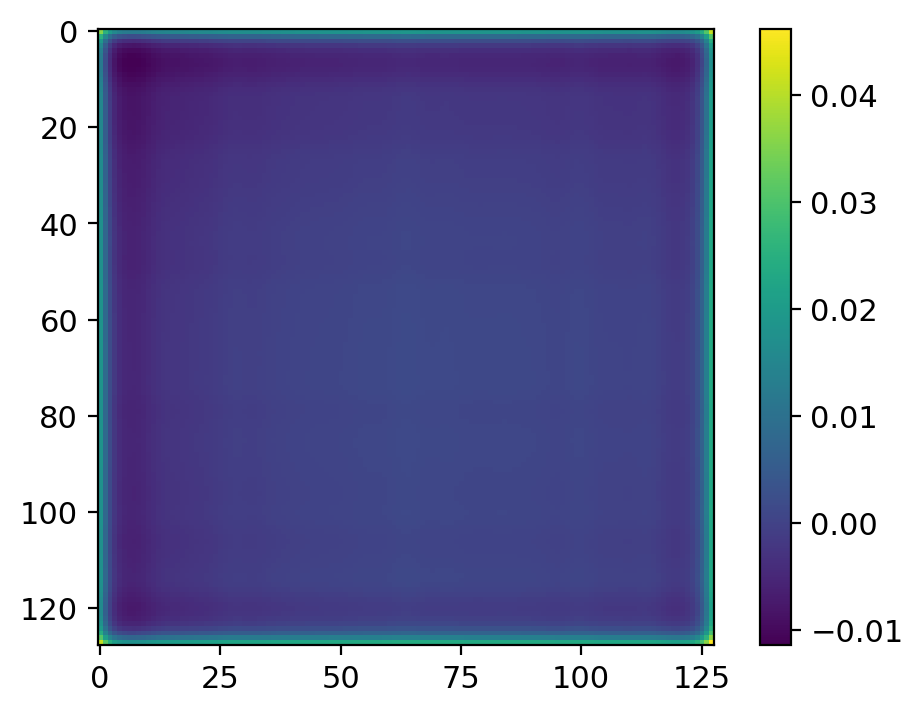

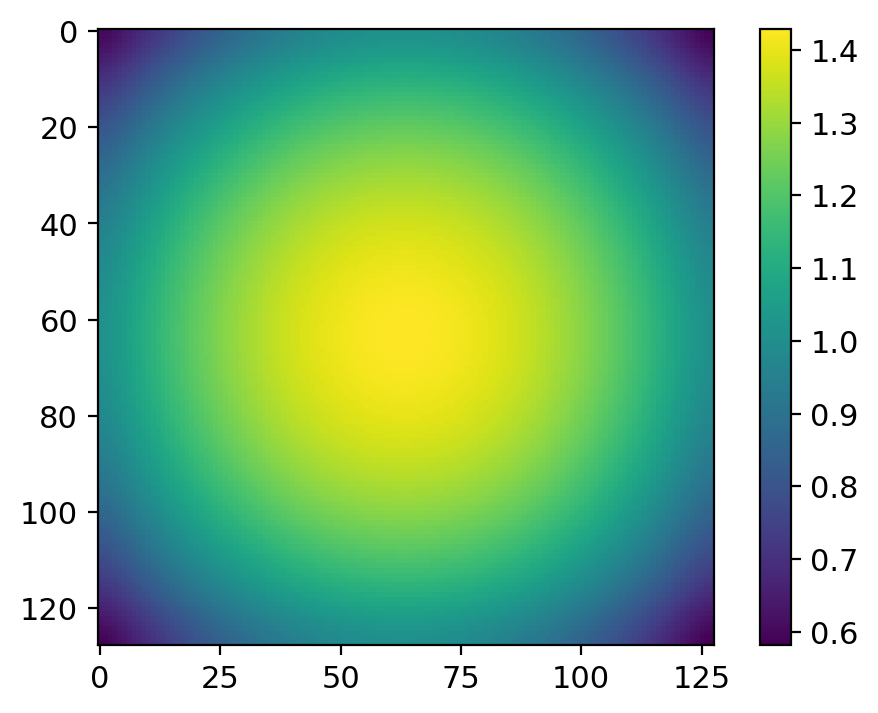

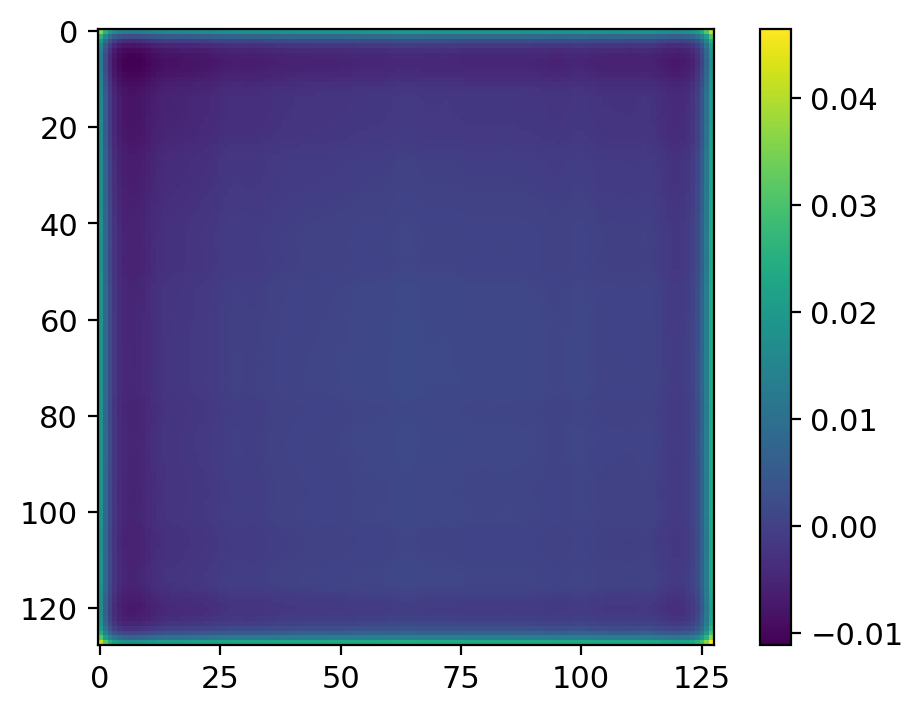

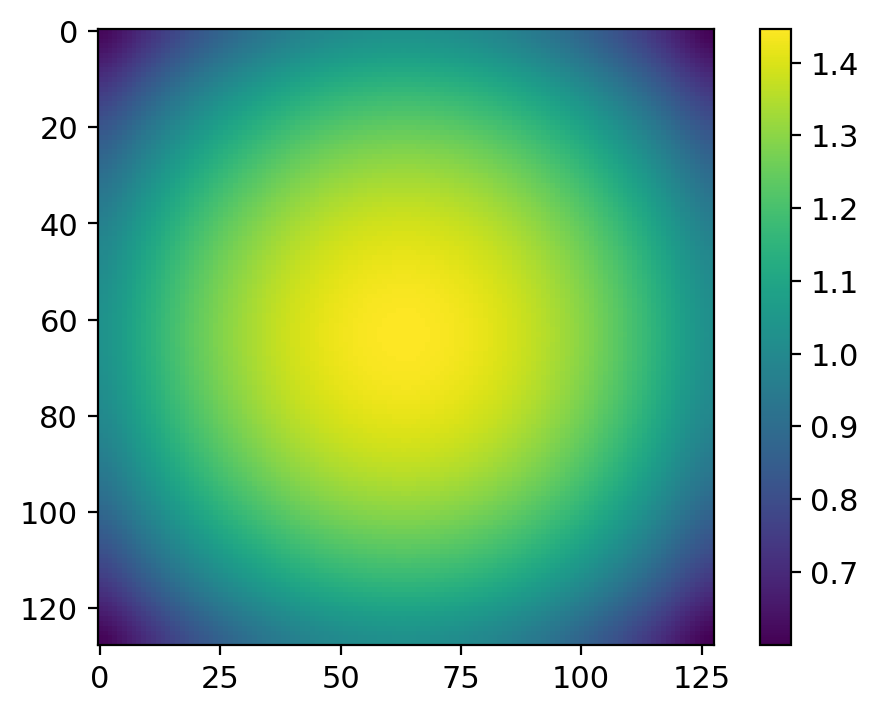

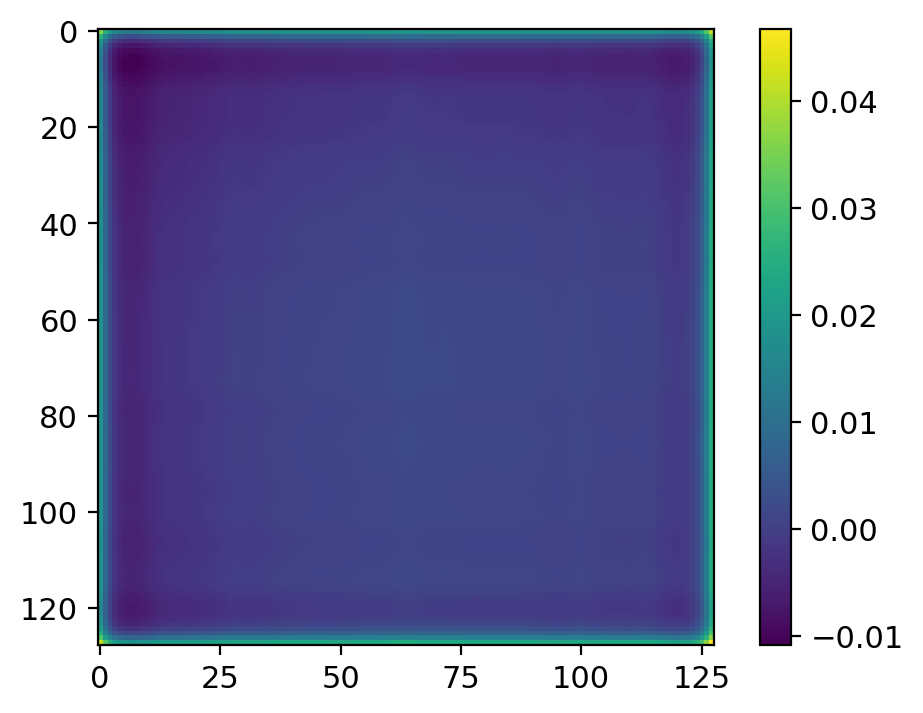

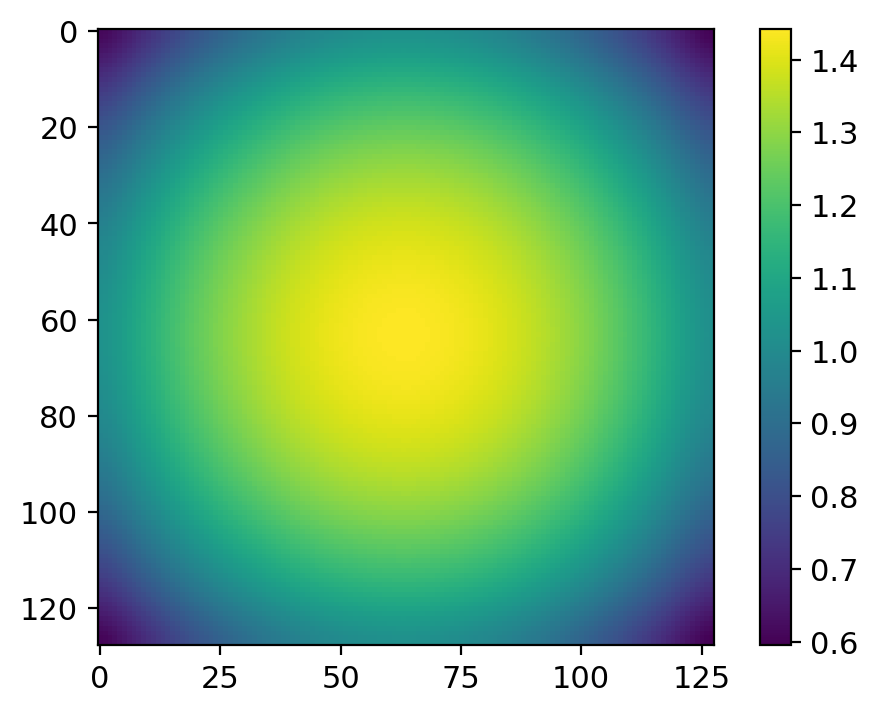

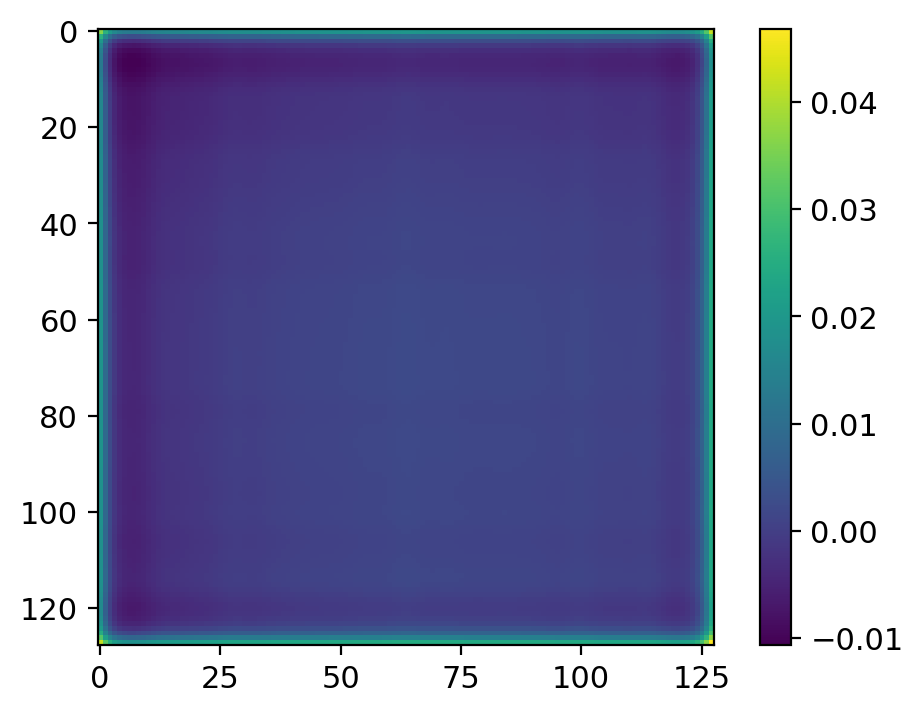

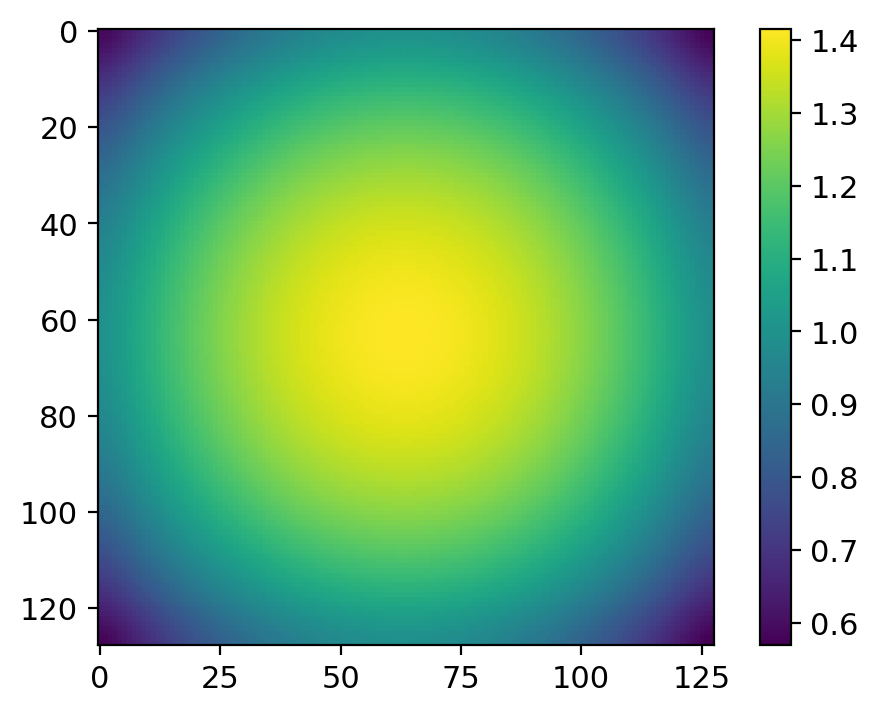

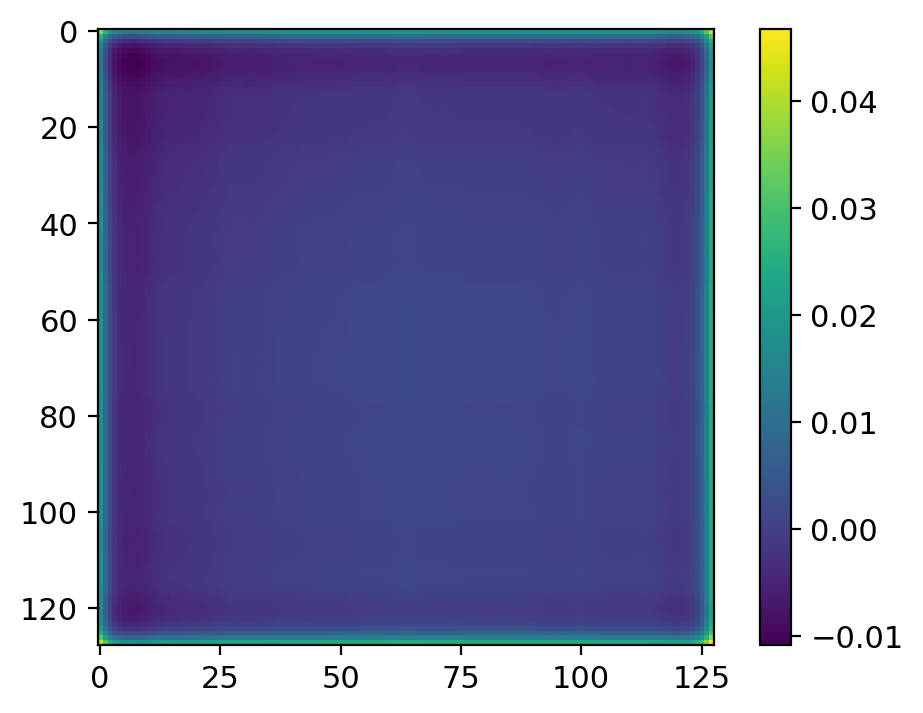

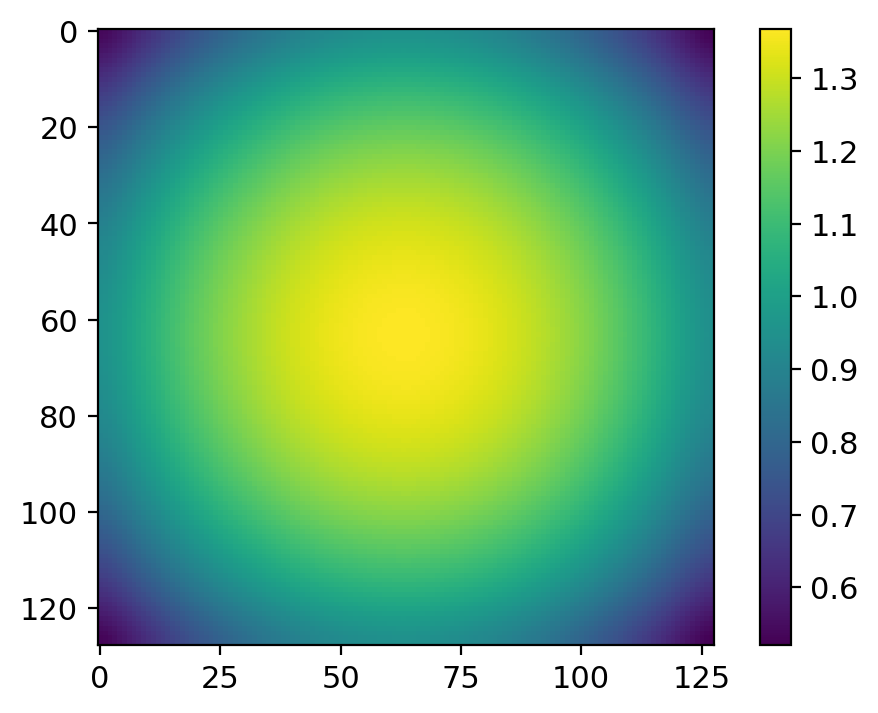

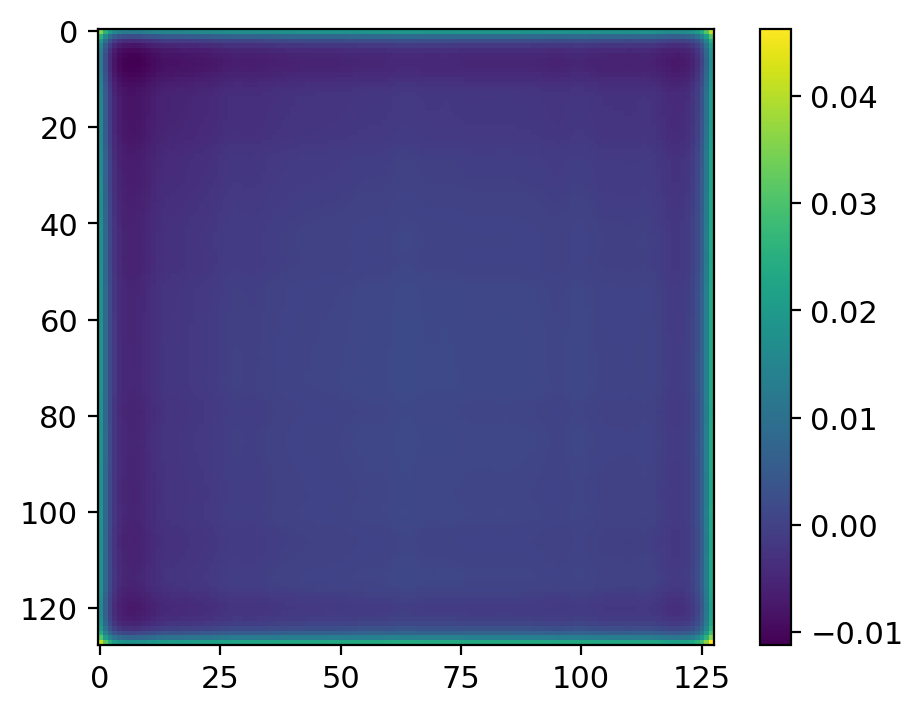

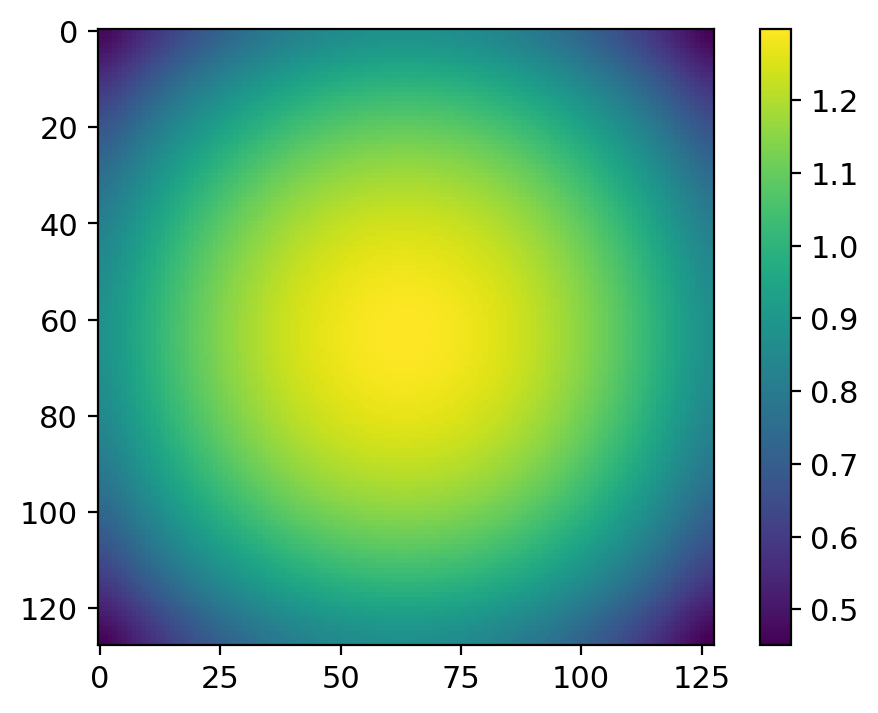

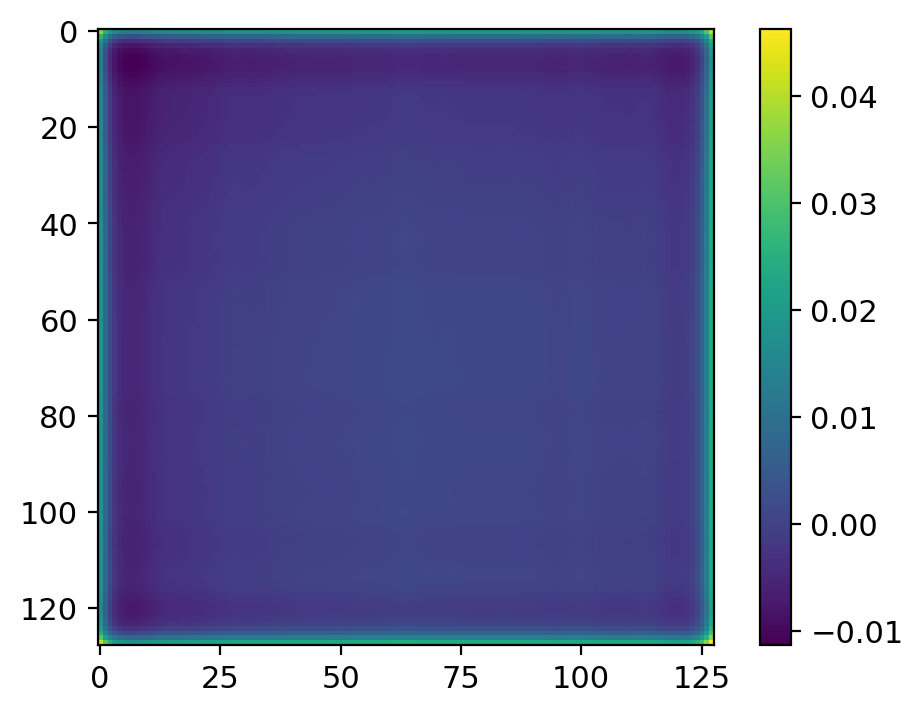

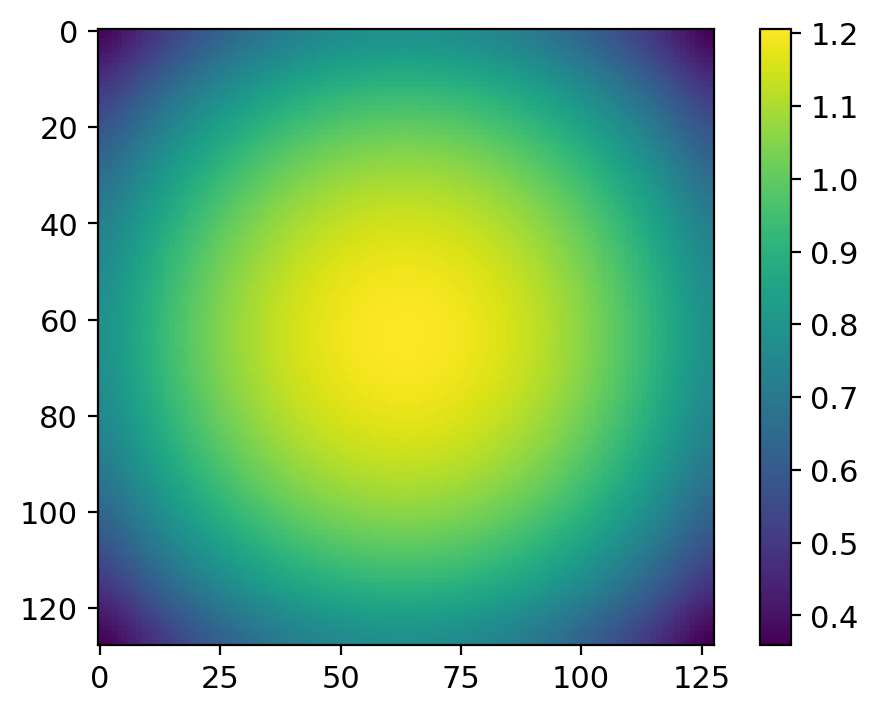

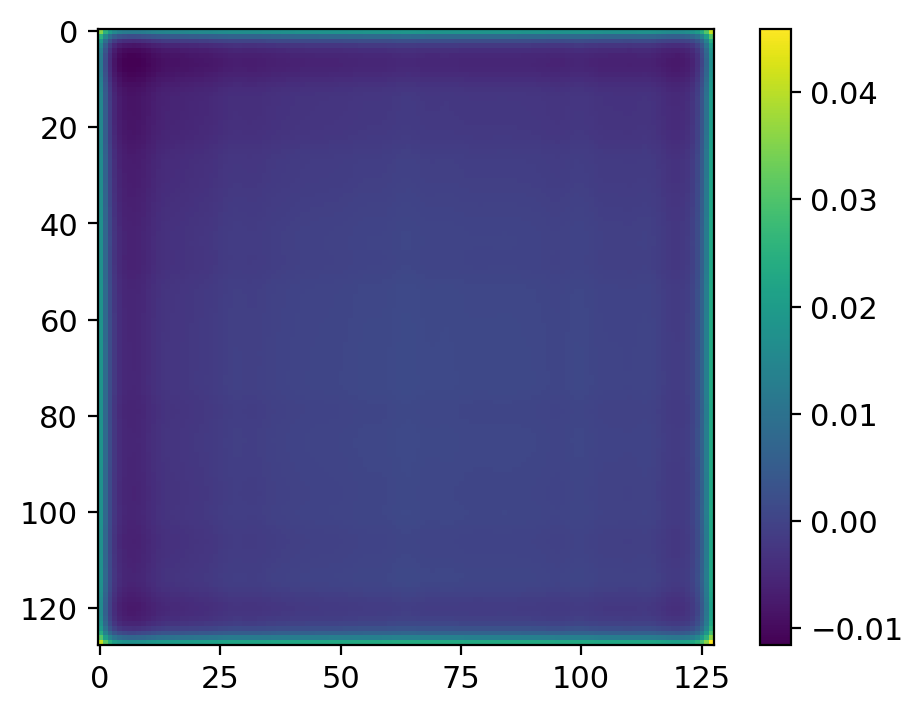

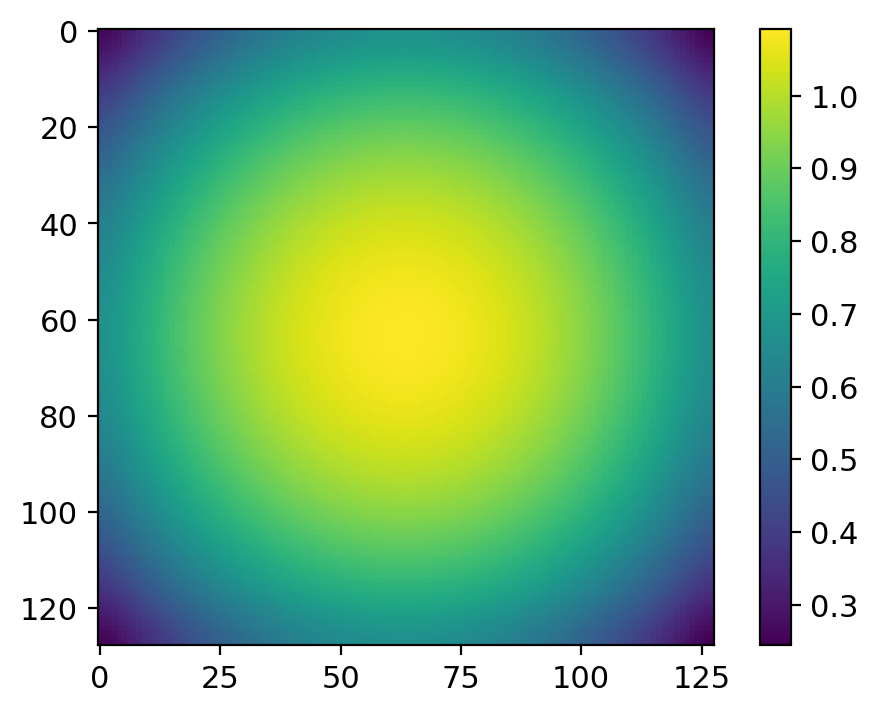

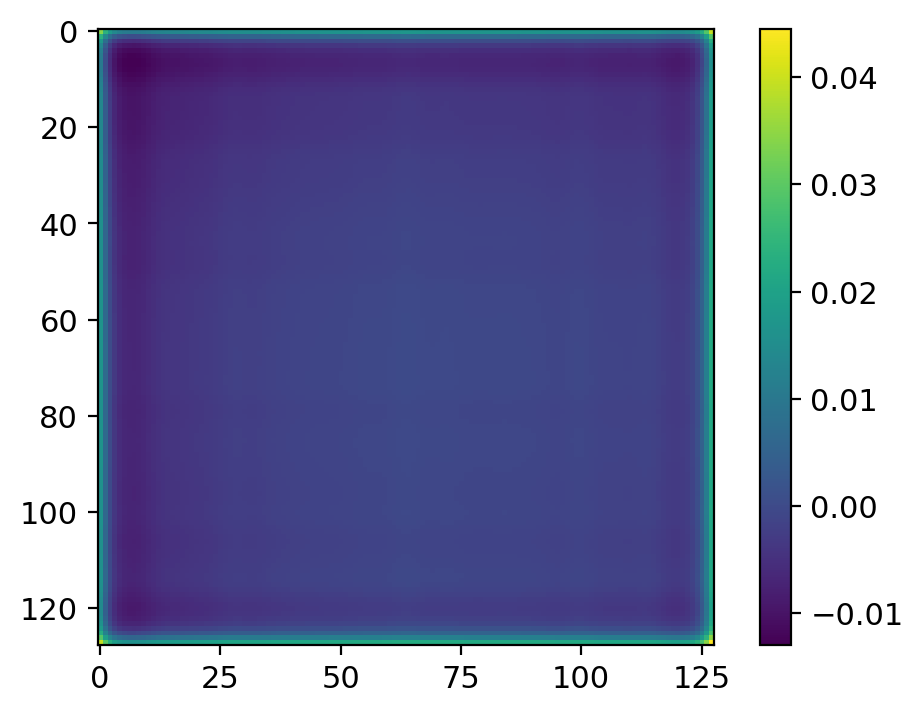

In [8]:
for i in range(0,size,10):
    plt.imshow(basic.flatfield[:,:,i])
    plt.colorbar()
    plt.show()
    plt.imshow(basic.flatfield[:,:,i]-truth[:,:,i])
    plt.colorbar()
    plt.show()

In [12]:
np.max(np.abs(basic.flatfield - truth))

0.068984635